In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import os

# this function helps you to convert the listed data in dataframe into a list (plddt etc.)
def string_to_float_list(string):
    return [float(i) if i!='None' else None for i in string.split(',') ]

# this function helps you to convert the sequence data in dataframe into a list (secondary structure etc.)
def ss_string_to_list(string):
    return [float(i) for i in string.strip('][').split(',')]

def merge_list(list_of_list):
    return [item for sublist in list_of_list for item in sublist]

def filter_function(df):
    filter_list = []
    for i in range(len(df)):
        if df['model_1_ptm_avg_plddt'][i] >= 70 and df['model_2_ptm_avg_plddt'][i] > 70 and df['model_3_ptm_avg_plddt'][i] > 70 and df['model_4_ptm_avg_plddt'][i] > 70 and df['model_5_ptm_avg_plddt'][i] >= 70:
            filter_list.append(True)
        else:
            filter_list.append(False)
    return filter_list

In [2]:
# feature in dataframe:
# ID, name, sequence, sequence_length, structure_avail, [model_name]_avg_plddt
# with model name: disulfide_bond, hydrogen_bond, salt_bridge, surface, SASA, secondary_structure, chirality, phi_angle, psi_angle, omega_angle, plddt

In [3]:
# Define function to calculate secondary structure percentage
def calc_ss_percent(ss_string):
    Helix_len = 0
    Sheet_len = 0
    LoopR_len = 0

    for i in range(len(ss_string)):
        if ss_string[i] == 'H':
            Helix_len += 1
        elif ss_string[i] == 'S':
            Sheet_len += 1
        elif ss_string[i] == 'L':
            LoopR_len += 1
        else:
            return BaseException
    return Helix_len/len(ss_string),Sheet_len/len(ss_string),LoopR_len/len(ss_string)

In [4]:
# read data
df_A501 = pd.read_csv('A501_results.tsv', sep='\t')
df_3DAC = pd.read_csv('3DAC_results.tsv', sep='\t')

df_list_paper = [df_A501,df_3DAC]
tick_list_paper = ["A501","3DAC"]
color_list_paper = ["tab:red","tab:blue"]
cmap_list_paper = ["Reds","Blues"]


# Calculate secondary structure percentage
for j in range(len(df_list_paper)):

    ss_H_list_paper = []
    ss_S_list_paper = []
    ss_L_list_paper = []
    for i in range(df_list_paper[j].shape[0]):
        ss_H,ss_S,ss_L = calc_ss_percent(df_list_paper[j]["secondary_structure_relaxed_model_3_ptm"][i])
        ss_H_list_paper.append(ss_H)
        ss_S_list_paper.append(ss_S)
        ss_L_list_paper.append(ss_L)
    df_list_paper[j]["ss_H"] = ss_H_list_paper
    df_list_paper[j]["ss_S"] = ss_S_list_paper
    df_list_paper[j]["ss_L"] = ss_L_list_paper

print("A501 removed:",df_A501.shape[0]-sum(filter_function(df_A501)))
print("3DAC removed:",df_3DAC.shape[0]-sum(filter_function(df_3DAC)))


# print mean plddt
print("A501 average pLDDT:", np.mean([np.mean(df_A501["model_1_ptm_avg_plddt"]),
                                      np.mean(df_A501["model_2_ptm_avg_plddt"]),
                                      np.mean(df_A501["model_3_ptm_avg_plddt"]),
                                      np.mean(df_A501["model_4_ptm_avg_plddt"]),
                                      np.mean(df_A501["model_5_ptm_avg_plddt"])]))
print("3DAC average pLDDT:", np.mean([np.mean(df_3DAC["model_1_ptm_avg_plddt"]),
                                      np.mean(df_3DAC["model_2_ptm_avg_plddt"]),
                                      np.mean(df_3DAC["model_3_ptm_avg_plddt"]),
                                      np.mean(df_3DAC["model_4_ptm_avg_plddt"]),
                                      np.mean(df_3DAC["model_5_ptm_avg_plddt"])]))

A501 removed: 0
3DAC removed: 0
A501 average pLDDT: 88.6277890986722
3DAC average pLDDT: 82.33525074544423


RanksumsResult(statistic=6.339091746261468, pvalue=2.3112358386228624e-10)


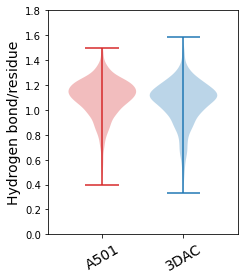

In [5]:
# Hydrogen bond
plt.figure(figsize=(3.5,4))


for i in range(len(df_list_paper)):
    parts = plt.violinplot(df_list_paper[i][filter_function(df_list_paper[i])]["hydrogen_bond_relaxed_model_3_ptm"]/df_list_paper[i][filter_function(df_list_paper[i])]["sequence_length"],positions=[0+0.6*i])
    for pc in parts['bodies']:
        pc.set_facecolor(color_list_paper[i])
    parts['cbars'].set_color(color_list_paper[i])
    parts['cmaxes'].set_color(color_list_paper[i])
    parts['cmins'].set_color(color_list_paper[i])




plt.xlim(-0.4,0.4+0.6*(len(df_list_paper)-1))
plt.ylim(0,1.8)

# plt.title("Hydrogen bond per residue",fontsize=16)
plt.ylabel("Hydrogen bond/residue",fontsize=14)
plt.xticks(np.arange(0,0.6*(len(df_list_paper)-1)+0.1,0.6),tick_list_paper,fontsize=14,rotation=30)
plt.tight_layout()


print(stats.ranksums(df_A501[filter_function(df_A501)]["hydrogen_bond_relaxed_model_3_ptm"]/df_A501[filter_function(df_A501)]["sequence_length"],
                     df_3DAC[filter_function(df_3DAC)]["hydrogen_bond_relaxed_model_3_ptm"]/df_3DAC[filter_function(df_3DAC)]["sequence_length"],
                     alternative='two-sided'))


plt.savefig("Figure/Figure_hydrogen_bond_paper.pdf")
plt.savefig("Figure/Figure_hydrogen_bond_paper.png")

RanksumsResult(statistic=-2.6492655951712796, pvalue=0.008066690939360677)


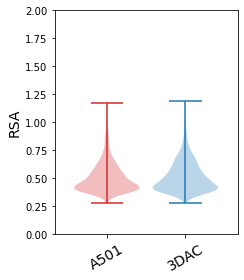

In [6]:
# RSA
plt.figure(figsize=(3.5,4))

for i in range(len(df_list_paper)):
    parts = plt.violinplot(df_list_paper[i][filter_function(df_list_paper[i])]["SASA_relaxed_model_3_ptm"]/df_list_paper[i][filter_function(df_list_paper[i])]["surface_relaxed_model_3_ptm"],positions=[0+0.6*i])
    for pc in parts['bodies']:
        pc.set_facecolor(color_list_paper[i])
    parts['cbars'].set_color(color_list_paper[i])
    parts['cmaxes'].set_color(color_list_paper[i])
    parts['cmins'].set_color(color_list_paper[i])



plt.xlim(-0.4,0.4+0.6*(len(df_list_paper)-1))
plt.ylim(0,2)

# plt.title("Relative surface area",fontsize=16)
plt.ylabel("RSA",fontsize=14)
plt.xticks(np.arange(0,0.6*(len(df_list_paper)-1)+0.1,0.6),tick_list_paper,fontsize=14,rotation=30)
plt.tight_layout()

print(stats.ranksums(df_A501[filter_function(df_A501)]["SASA_relaxed_model_3_ptm"]/df_A501[filter_function(df_A501)]["surface_relaxed_model_3_ptm"],
                     df_3DAC[filter_function(df_3DAC)]["SASA_relaxed_model_3_ptm"]/df_3DAC[filter_function(df_3DAC)]["surface_relaxed_model_3_ptm"],
                     alternative='two-sided'))


plt.savefig("Figure/Figure_RSA_paper.pdf")
plt.savefig("Figure/Figure_RSA_paper.png")

RanksumsResult(statistic=-2.5520517980564255, pvalue=0.010709059634275469)


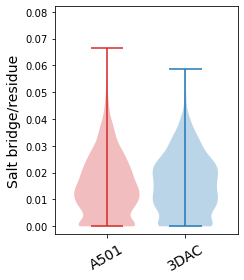

In [7]:
plt.figure(figsize=(3.5,4))


for i in range(len(df_list_paper)):
    parts = plt.violinplot(df_list_paper[i][filter_function(df_list_paper[i])]["salt_bridge_relaxed_model_3_ptm"].to_numpy()/df_list_paper[i][filter_function(df_list_paper[i])]["sequence_length"].to_numpy(),positions=[0+0.6*i])
    for pc in parts['bodies']:
        pc.set_facecolor(color_list_paper[i])
    parts['cbars'].set_color(color_list_paper[i])
    parts['cmaxes'].set_color(color_list_paper[i])
    parts['cmins'].set_color(color_list_paper[i])





plt.xlim(-0.4,0.4+0.6*(len(df_list_paper)-1))
plt.ylim(-0.003,0.082)

# plt.title("Salt bridge per residue",fontsize=16)
plt.ylabel("Salt bridge/residue",fontsize=14)
plt.xticks(np.arange(0,0.6*(len(df_list_paper)-1)+0.1,0.6),tick_list_paper,fontsize=14,rotation=30)
plt.tight_layout()

print(stats.ranksums(df_A501[filter_function(df_A501)]["salt_bridge_relaxed_model_3_ptm"]/df_A501[filter_function(df_A501)]["sequence_length"],
                     df_3DAC[filter_function(df_3DAC)]["salt_bridge_relaxed_model_3_ptm"]/df_3DAC[filter_function(df_3DAC)]["sequence_length"],
                     alternative='two-sided'))


plt.savefig("Figure/Figure_salt_bridge_paper.pdf")
plt.savefig("Figure/Figure_salt_bridge_paper.png")


d:\Anaconda3\envs\torch\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
d:\Anaconda3\envs\torch\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


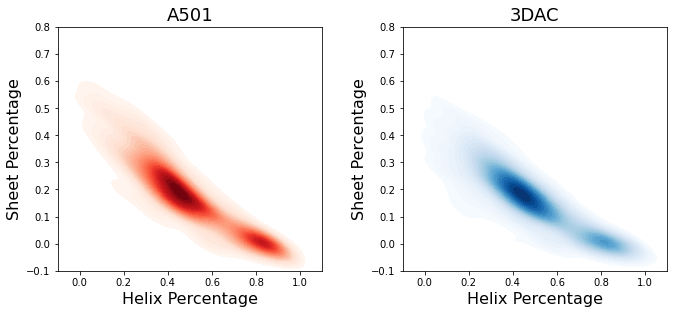

In [8]:
plt.figure(figsize=(10,5))

for i in range(len(df_list_paper)):
    plt.subplot(1,2,i+1)
    sns.kdeplot(df_list_paper[i][filter_function(df_list_paper[i])]["ss_H"],
                df_list_paper[i][filter_function(df_list_paper[i])]["ss_S"],
                shade=True,
                levels=30,
                cmap=cmap_list_paper[i])
    plt.ylim(-0.1,0.8)
    plt.xlim(-0.1,1.1)
    if i==0 or i==2:
        plt.title("%s"%tick_list_paper[i],fontsize=18)
    else:
        plt.title("%s"%tick_list_paper[i],fontsize=18)
    plt.xlabel("Helix Percentage",fontsize=16)
    plt.ylabel("Sheet Percentage",fontsize=16)

plt.tight_layout(pad=3)

plt.savefig("Figure/SS_kdeplot_paper.pdf")
plt.savefig("Figure/SS_kdeplot_paper.png")